In [14]:
import pandas
import geopandas
import rasterio
from rasterio import plot
import matplotlib
import matplotlib.pyplot as plt
print("Hello World")
%matplotlib inline





Hello World


1
10980
10980


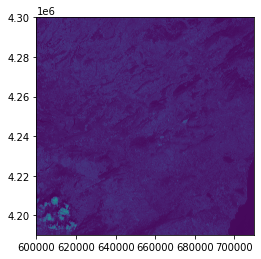

<AxesSubplot:>

In [15]:

# %matplotlab inline
pathSat = '/workspaces/Experimento 1 & 2/deliverables-master/sentinel_2_SE'

#blue
band2 = rasterio.open(pathSat + '/T30SXH_20200828T105031_B02.jp2', driver='JP2OpenJPEG')
#green
band3 = rasterio.open(pathSat + '/T30SXH_20200828T105031_B03.jp2', driver='JP2OpenJPEG')
#red
band4 = rasterio.open(pathSat + '/T30SXH_20200828T105031_B04.jp2', driver='JP2OpenJPEG')
#near-infrared (nir)
band8 = rasterio.open(pathSat + '/T30SXH_20200828T105031_B08.jp2', driver='JP2OpenJPEG')

#Bands that contains (should be 1)
print(band4.count)

#colums
print(band4.width)

#rows
print(band4.height)

#Plot matrix array
plot.show(band4)

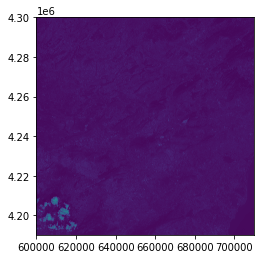

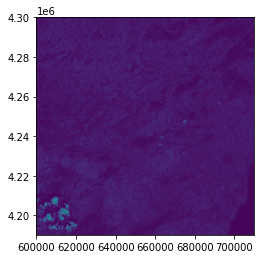

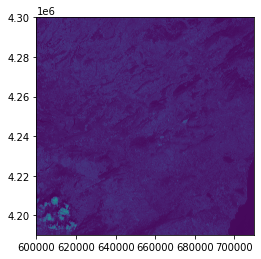

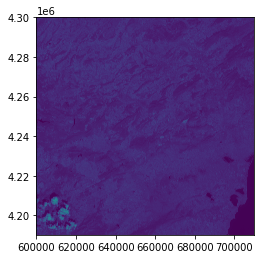

In [16]:
#Plot matrix array
a = [band2, band3, band4, band8]
for i in a:
    plot.show(i)
    

In [29]:
#for data type
band4._dtypes

#proyection of the raster
band3.crs

#trabsform parameters => Convert matrix to raster
band4.transform

Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 4300020.0)

In [28]:
# fig, (ax1, ax2, ax3) = plt.subplot(1,3, figsize=(12,4)) 
# plt.subplot()
# plot.show(band2, ax=ax1, cmap='Blues')
# plot.show(band3, ax=ax2, cmap='Greens')
# plot.show(band4, ax=ax4, cmap='Reds')
# fig.tight_layout()

In [34]:
#Opne a TIFF=> w->write mode
trueColor = rasterio.open(pathSat + '/output.tiff','w', driver='Gtiff',width=band4.width, height=band4.height, count=3, crs=band4.crs, transform=band4.transform, dtype=band4.dtypes[0])


In [35]:
#Bluie
trueColor.write(band2.read(1),3)
#green and red
trueColor.write(band3.read(1),2)
trueColor.write(band4.read(1),1)
trueColor.close
